# Yogurt
from the kaggle R data set dump....... Yogurt!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Yogurt = pd.read_csv("./.kaggle_data/Rdatasets/Yogurt.csv").drop("Unnamed: 0",axis=1)
Yogurt.shape

(2412, 10)

In [3]:
Yogurt.head(n=10)

,id,feat.yoplait,feat.dannon,feat.hiland,feat.weight,price.yoplait,price.dannon,price.hiland,price.weight,choice
0,1,0,0,0,0,10.8,8.1,6.1,7.9,weight
1,1,0,0,0,0,10.8,9.8,6.4,7.5,dannon
2,1,0,0,0,0,10.8,9.8,6.1,8.6,dannon
3,1,0,0,0,0,10.8,9.8,6.1,8.6,dannon
4,1,0,0,0,0,12.5,9.8,4.9,7.9,dannon
5,1,0,0,0,0,10.8,9.2,5.0,7.9,dannon
6,1,0,0,0,0,10.3,8.1,4.9,7.9,dannon
7,1,0,0,0,0,10.8,8.6,5.4,7.9,weight
8,2,0,0,0,0,10.8,9.8,5.0,7.9,yoplait
9,2,0,0,0,0,10.8,9.8,5.0,7.9,yoplait


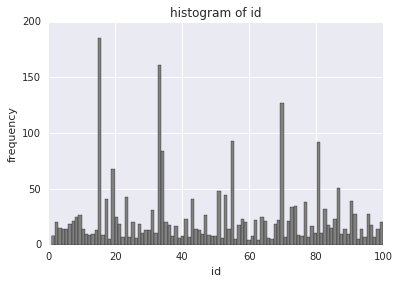

In [4]:
plt.hist(Yogurt["id"],bins=100,color='grey')
plt.title("histogram of id")
plt.xlabel("id")
plt.ylabel("frequency")
plt.show()

### Description of data set

The CSV file does not come with a description, but everything seems pretty self explanitory. Hopefully the following is correct......

- id identifies a customer
- feat.brand tells you if the brand of yougurt is being featured or not
- price.brand tells you the current price of the yogurt
- choice tells you what was purchased.

there are a lot of questions to ask here: 

- do some brands sell more than others?
- brand loyalty. Do specific customers prefer a specific brand? Can price or feature make them change there mind?
- if a brand is being featured, do more people buy it?
- if a brand is cheap/expensive, do more people buy it?
- how do featuring and price interact?

### do some brands sell more than others?

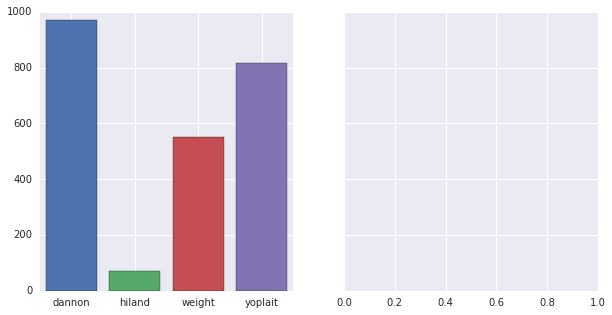

In [5]:
x = np.transpose(np.stack(np.unique(Yogurt["choice"],return_counts=True)))

brands = x[:,0].tolist()
num_purchases = x[:,1].tolist()

vg_price = np.array([Yogurt["price.dannon"].mean(),
                      Yogurt["price.hiland"].mean(),
                      Yogurt["price.weight"].mean(),
                      Yogurt["price.yoplait"].mean()])

xticks = [0,1,2,3]

colors = sns.color_palette()

f, ax = plt.subplots(1,2, sharey=True,figsize=(10, 5))
ax[0].bar(xticks,num_purchases,align='center',color=colors)
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(brands)
plt.show()